<a href="https://colab.research.google.com/github/mrturizo/soccer-international-matches_prediction/blob/main/VFINAL_WC2022_Partidos_de_f%C3%BAtbol_V1_3b_(antes_de_juego%2C_sin_conocer_score%2C_ni_estado)_MINIPROYECTO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias Necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError

| Header | Definition |
| --- | --- |
| date | The date of the match (YYYY-MM-DD) |
| league_id | A unique identifier for the league this match was played in |
| league | The name of the league this match was played in |
| team1 | The home team's name |
| team2 | The away team's name |
| spi1 | The home team's overall SPI rating before the match |
| spi2 | The away team's overall SPI rating before the match |
| prob1 | The probability of the home team winning the match |
| prob2 | The probability of the away team winning the match |
| probtie | The probability of match ending in a draw (if applicable) |
| proj_score1 | The number of goals we expected the home team to score |
| proj_score2 | The number of goals we expected the away team to score |
| importance1 | The importance of the match for the home team (0-100) |
| importance2 | The importance of the match for the away team (0-100) |
| score1 | The number of goals scored by the home team |
| score2 | The number of goals scored by the away team |
| xg1 | The number of expected goals created by the home team |
| xg2 | The number of expected goals created by the away team |
| nsxg1 | The number of non-shot expected goals created by the home team |
| nsxg2 | The number of non-shot expected goals created by the away team |
| adj_score1 | The number of goals scored by the home team, adjusted for game state |
| adj_score2 | The number of goals scored by the home team, adjusted for game state |


# Lectura WC 2022 Dataset




In [ ]:
# Reading data
data_df = pd.read_csv('wc_matches.csv') 
print(data_df.shape)
data_df.head()

(64, 20)


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,0.23,1.14,0.24,1.35,0.00,2.10
1,2022-11-21,1908,FIFA World Cup,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,1.70,0.58,6,2,1.04,1.45,1.50,0.32,5.78,2.10
2,2022-11-21,1908,FIFA World Cup,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0.99,1.63,0,2,0.70,0.68,1.22,1.83,0.00,1.58
3,2022-11-21,1908,FIFA World Cup,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,1.42,1.01,1,1,0.33,1.78,0.48,0.95,1.05,1.05
4,2022-11-22,1908,FIFA World Cup,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,2.11,0.54,1,2,1.63,0.15,2.40,0.53,1.05,2.10


In [ ]:
datos=data_df

In [ ]:
datos=datos.drop(["date", "league_id", "league"], axis= 1)
datos.head()

,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,0.23,1.14,0.24,1.35,0.00,2.10
1,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,1.70,0.58,6,2,1.04,1.45,1.50,0.32,5.78,2.10
2,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0.99,1.63,0,2,0.70,0.68,1.22,1.83,0.00,1.58
3,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,1.42,1.01,1,1,0.33,1.78,0.48,0.95,1.05,1.05
4,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,2.11,0.54,1,2,1.63,0.15,2.40,0.53,1.05,2.10


#Exploración de Variables (EDA)

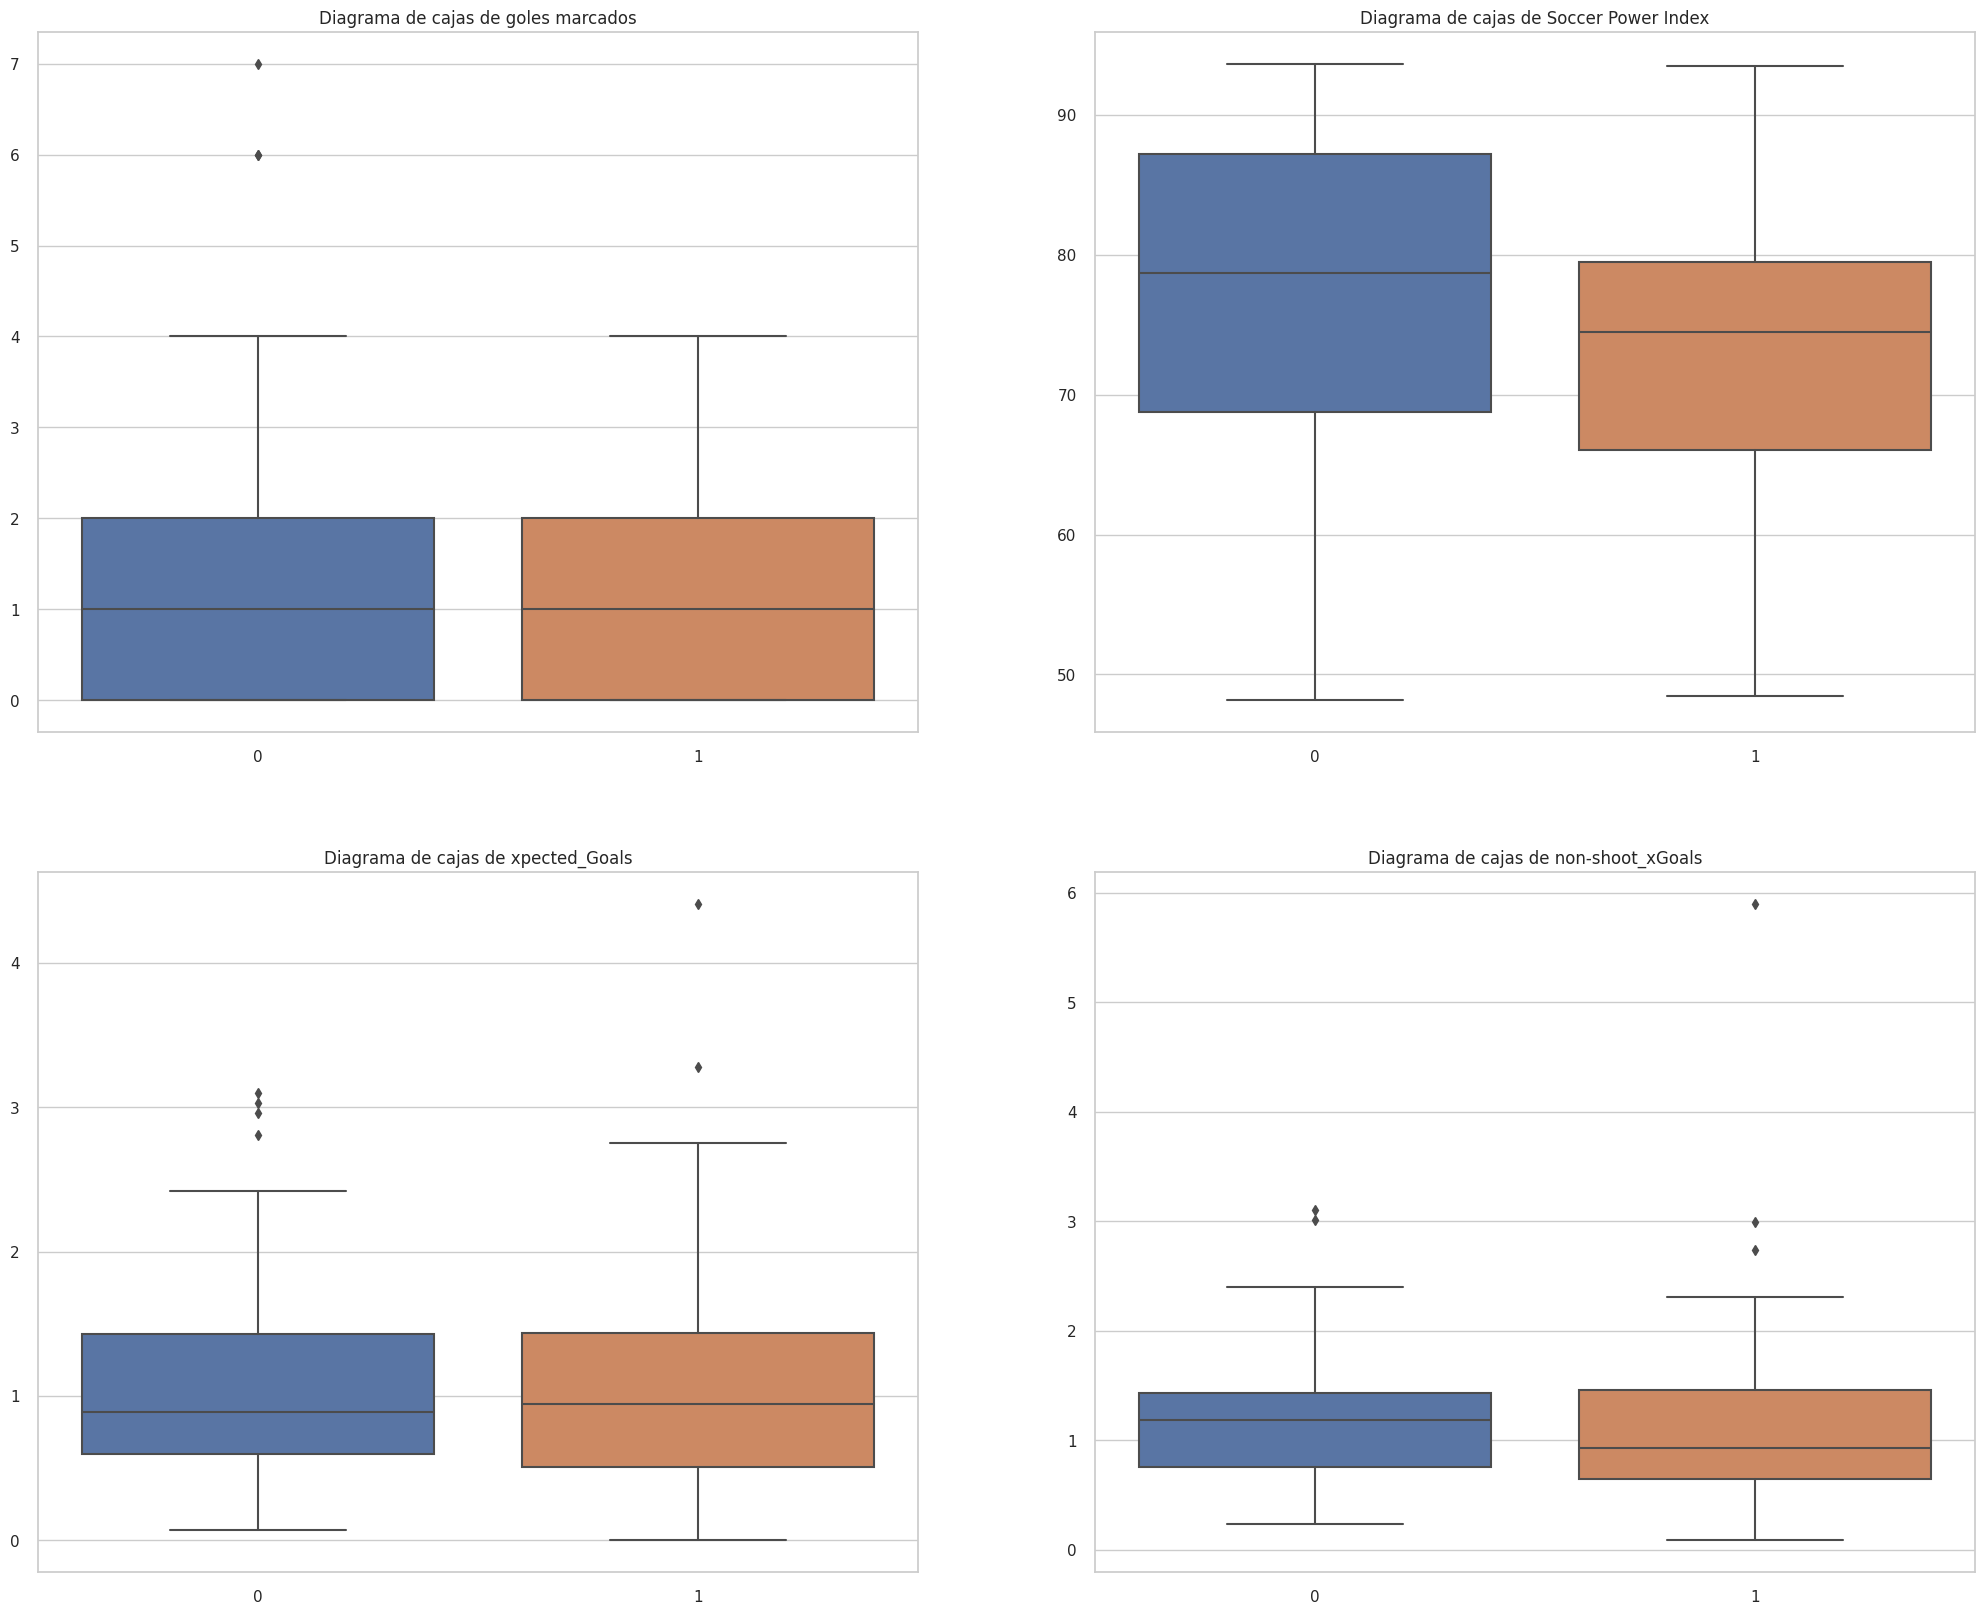

In [ ]:
# Realizar un diagrama de cajas de las variables de mayor interés
sns.set(style="whitegrid")
fig, ax = plt.subplots(2, 2, figsize=(25, 20))

sns.boxplot([datos["score1"],datos["score2"]], ax=ax[0,0])
ax[0,0].set_title("Diagrama de cajas de goles marcados")

sns.boxplot([datos["spi1"],datos["spi2"]], ax=ax[0,1])
ax[0,1].set_title("Diagrama de cajas de Soccer Power Index")

sns.boxplot([datos["xg1"],datos["xg2"]], ax=ax[1,0])
ax[1,0].set_title("Diagrama de cajas de xpected_Goals")

sns.boxplot([datos["nsxg1"],datos["nsxg2"]], ax=ax[1,1])
ax[1,1].set_title("Diagrama de cajas de non-shoot_xGoals")


plt.show()

##Verificación de variables no nulas

In [ ]:
datos.info()
total = datos.isnull().sum().sort_values(ascending=False)
percent_1 = datos.isnull().sum()/datos.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(datos.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team1        64 non-null     object 
 1   team2        64 non-null     object 
 2   spi1         64 non-null     float64
 3   spi2         64 non-null     float64
 4   prob1        64 non-null     float64
 5   prob2        64 non-null     float64
 6   probtie      64 non-null     float64
 7   proj_score1  64 non-null     float64
 8   proj_score2  64 non-null     float64
 9   score1       64 non-null     int64  
 10  score2       64 non-null     int64  
 11  xg1          64 non-null     float64
 12  xg2          64 non-null     float64
 13  nsxg1        64 non-null     float64
 14  nsxg2        64 non-null     float64
 15  adj_score1   64 non-null     float64
 16  adj_score2   64 non-null     float64
dtypes: float64(13), int64(2), object(2)
memory usage: 8.6+ KB


,Total,%
team1,0,0.0
score1,0,0.0
adj_score1,0,0.0
nsxg2,0,0.0
nsxg1,0,0.0
xg2,0,0.0
xg1,0,0.0
score2,0,0.0
proj_score2,0,0.0
team2,0,0.0


In [ ]:
#Making a new colum named "Win_Statues" to store the result(Win,Lost,Draw) of the home team

conditions  = [datos["score1"] ==datos["score2"], datos["score1"] > datos["score2"] , datos["score1"] < datos["score2"]]
choices     = [ "Draw", 'Win', 'Lost' ]
datos["Win_Statues"] = np.select(conditions, choices)
datos.head(5)

,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Win_Statues
0,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,0.23,1.14,0.24,1.35,0.00,2.10,Lost
1,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,1.70,0.58,6,2,1.04,1.45,1.50,0.32,5.78,2.10,Win
2,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0.99,1.63,0,2,0.70,0.68,1.22,1.83,0.00,1.58,Lost
3,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,1.42,1.01,1,1,0.33,1.78,0.48,0.95,1.05,1.05,Draw
4,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,2.11,0.54,1,2,1.63,0.15,2.40,0.53,1.05,2.10,Lost


## Mapa de Calor: Correlación (variables numéricas)

In [ ]:
datosnum=datos._get_numeric_data()

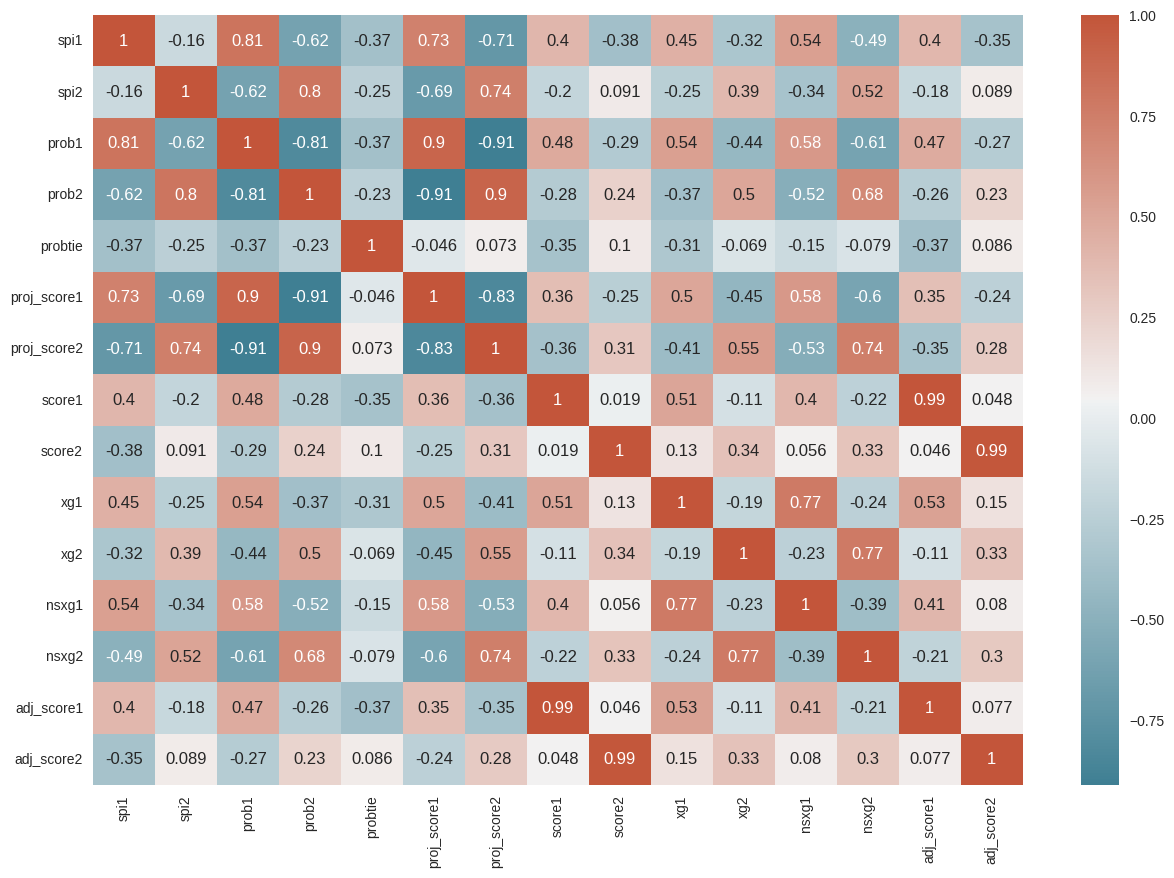

In [ ]:
corr = datosnum.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [ ]:
datosnum.describe()

,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,77.321094,74.295781,0.443198,0.358316,0.198484,1.325312,1.139219,1.578125,1.109375,1.075469,1.108906,1.194375,1.155312,1.572031,1.121563
std,11.158028,10.785255,0.204479,0.195187,0.122114,0.476821,0.434596,1.551289,1.055856,0.725199,0.840210,0.595696,0.874105,1.489658,1.061595
min,48.160000,48.460000,0.036300,0.059500,0.000000,0.310000,0.440000,0.000000,0.000000,0.070000,0.000000,0.240000,0.090000,0.000000,0.000000
25%,68.747500,66.052500,0.285125,0.203875,0.108150,0.985000,0.820000,0.000000,0.000000,0.600000,0.507500,0.760000,0.647500,0.000000,0.000000
50%,78.725000,74.460000,0.445950,0.312150,0.257500,1.315000,1.055000,1.000000,1.000000,0.885000,0.940000,1.185000,0.935000,1.050000,1.050000
75%,87.232500,79.505000,0.607025,0.504700,0.291175,1.620000,1.367500,2.000000,2.000000,1.430000,1.435000,1.432500,1.462500,2.100000,2.100000
max,93.660000,93.480000,0.826100,0.811200,0.337100,2.600000,2.550000,7.000000,4.000000,3.100000,4.410000,3.100000,5.900000,6.220000,3.720000


## Distribución de las Clases en el dataset

Rows, Columns: (64, 18)
Win_Statues
Draw    15
Lost    20
Win     29
dtype: int64 ['Draw' 'Lost' 'Win'] [15 20 29]


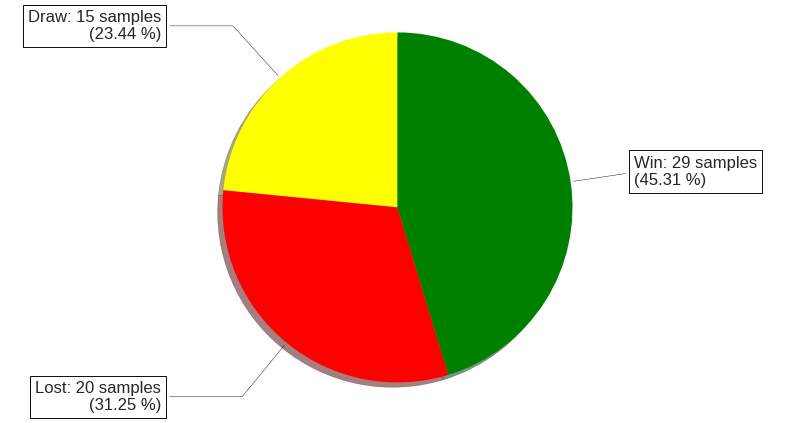

In [ ]:
print("Rows, Columns:",datos.shape)
Clases = datos.groupby('Win_Statues').size()
labels = Clases.index.values
sizes = Clases.values
print(Clases,labels,sizes)
muestra = []

for k in range(0,labels.size):
  texto = str(labels[k])+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)

colors = ['yellow','red','green','#E6B0AA','#D7BDE2','#A9CCE3','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60','#A569BD','#C0392B','#138D75']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(10,5),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

#Preprocesamiento de Datos

###Definición de las caracteristicas (X) y la variable a estimar (Y) 

In [ ]:
#See what are the Countries in the dataset

countries=datos.team1.unique()
print(f"There are {len(countries)} Countries in the home_team Column\n")
print(f"Countries-{countries}")

There are 32 Countries in the home_team Column

Countries-['Qatar' 'England' 'Senegal' 'USA' 'Argentina' 'Denmark' 'Mexico' 'France'
 'Morocco' 'Germany' 'Spain' 'Belgium' 'Switzerland' 'Uruguay' 'Portugal'
 'Brazil' 'Wales' 'Netherlands' 'Tunisia' 'Poland' 'Japan' 'Croatia'
 'Cameroon' 'South Korea' 'Ecuador' 'Iran' 'Australia' 'Saudi Arabia'
 'Canada' 'Costa Rica' 'Ghana' 'Serbia']


In [ ]:
X = datos.drop(['Win_Statues', 'team1', 'team2', 'score1', 'score2', 'adj_score1', 'adj_score2'], axis=1) #En el dataframe X quitamos la variable de respuesta "Label"
print(X.shape)

(64, 11)


In [ ]:
le = LabelEncoder()
Y = datos['Win_Statues'].values.astype(str)
Y = le.fit_transform(Y)
print(Y.shape)
print("------------------------")
print(type(Y)) #Es un array
print("------------------------")
print(Y)

(64,)
------------------------
<class 'numpy.ndarray'>
------------------------
[1 2 1 0 1 0 0 2 0 1 2 2 2 0 2 2 1 1 0 0 1 2 2 2 1 1 2 0 0 1 2 2 2 1 1 1 2
 2 1 1 1 0 1 2 1 2 1 2 2 2 2 2 0 2 0 2 0 0 2 1 2 2 2 0]


###Eliminación de Valores faltantes 


In [ ]:
missing = (X.isnull().sum() / len(X)).sort_values(ascending = False)
missing = missing.index[missing > 0.5]
all_missing = list(set(missing))
print('Hay %d columnas con mas del 50%% de los datos vacios' % len(all_missing))

Hay 0 columnas con mas del 50% de los datos vacios


### Remover caracteristicas con varianza cero


In [ ]:
from sklearn.feature_selection import VarianceThreshold
v_thres = VarianceThreshold(threshold=0)
v_thres.fit(X)
Cols = X.columns[v_thres.get_support()]
X = v_thres.transform(X)
X = pd.DataFrame(X,columns=Cols)
X.shape

(64, 11)

###Identificar y eliminar colinealidades (alta correlacion) 

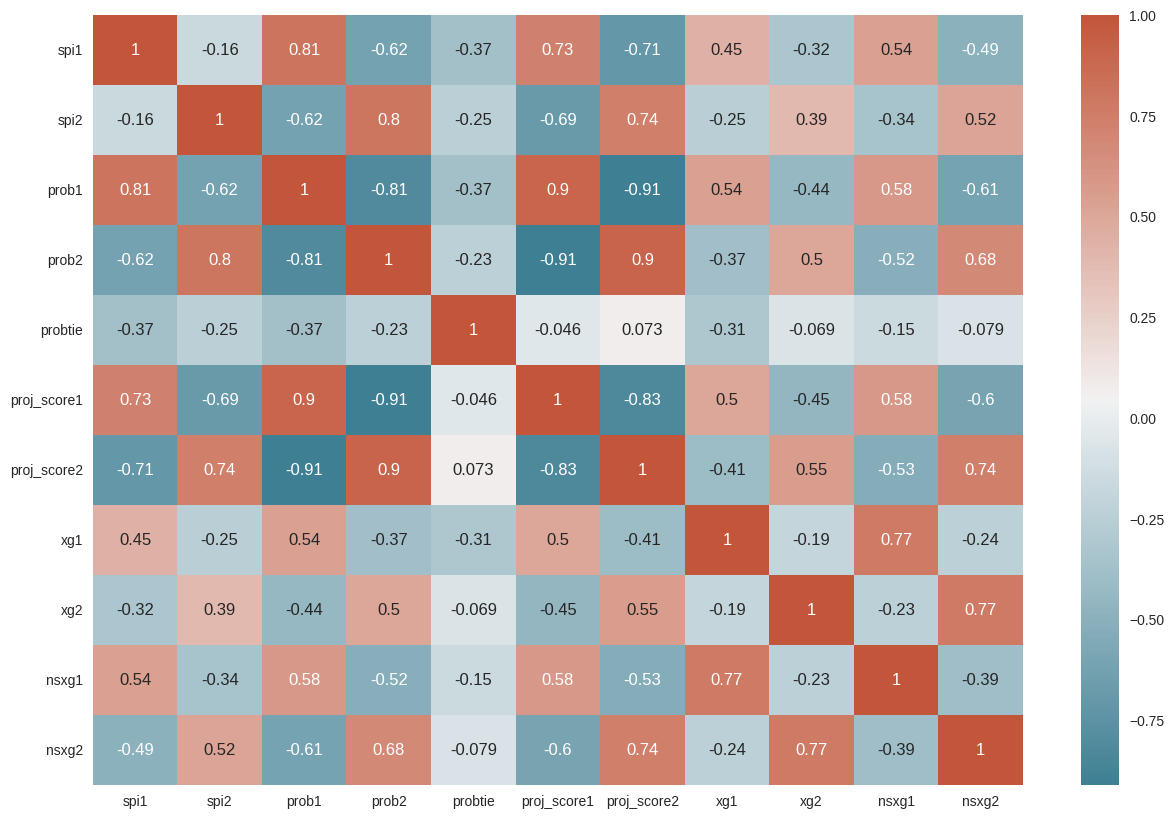

In [ ]:
corr = X.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [ ]:
#Threshold for removing correlated variables
threshold = 0.8
# Absolute value correlation matrix
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#Select the colums with high threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('Hay %d columnas para remover.' % (len(to_drop)))
print(to_drop)


Hay 4 columnas para remover.
['prob1', 'prob2', 'proj_score1', 'proj_score2']


| Header | Definition |
| --- | --- |
| spi1 | The home team's overall SPI rating before the match |
| spi2 | The away team's overall SPI rating before the match |
| **prob1** | The probability of the home team winning the match |
| **prob2** | The probability of the away team winning the match |
| probtie | The probability of match ending in a draw (if applicable) |
| **proj_score1** | The number of goals we expected the home team to score |
| **proj_score2** | The number of goals we expected the away team to score |
| *score1* | The number of goals scored by the home team | 
| *score2* | The number of goals scored by the away team |
| xg1 | The number of expected goals created by the home team |
| xg2 | The number of expected goals created by the away team |
| nsxg1 | The number of non-shot expected goals created by the home team |
| nsxg2 | The number of non-shot expected goals created by the away team |
| adj_score1 | The number of goals scored by the home team, adjusted for game state |
| adj_score2 | The number of goals scored by the home team, adjusted for game state |


In [ ]:
X = X.drop(to_drop, axis=1)
print(X.shape) 

(64, 7)


In [ ]:
view = X.columns
print(view)

Index(['spi1', 'spi2', 'probtie', 'xg1', 'xg2', 'nsxg1', 'nsxg2'], dtype='object')


In [ ]:
Y_df= pd.DataFrame(Y, columns=['Win_Statues'])

In [ ]:
concat_df = pd.concat([X, Y_df], axis=1)

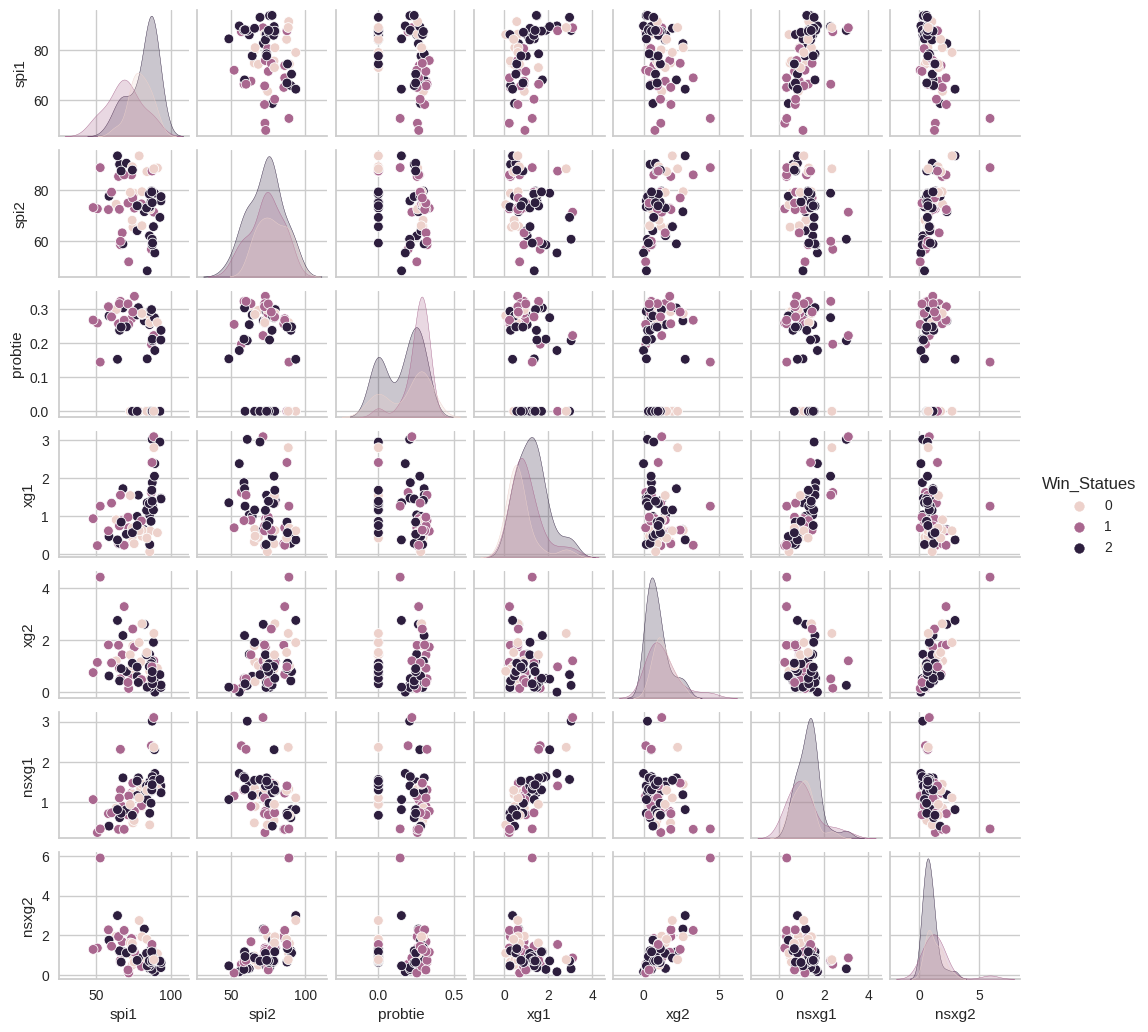

In [ ]:
sns.pairplot(concat_df,hue="Win_Statues",height=1.5)
plt.show()

##Normalización

In [ ]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1.fit(X)
X_n = scaler1.transform(X)
X_n = np.array(X_n)

##División del Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size = 0.2, stratify=Y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(51, 7)
(13, 7)
(51,)
(13,)


#Métodos

##Método 1:  Percerptrón (Monocapa)

### Selección de Hiperparámetros

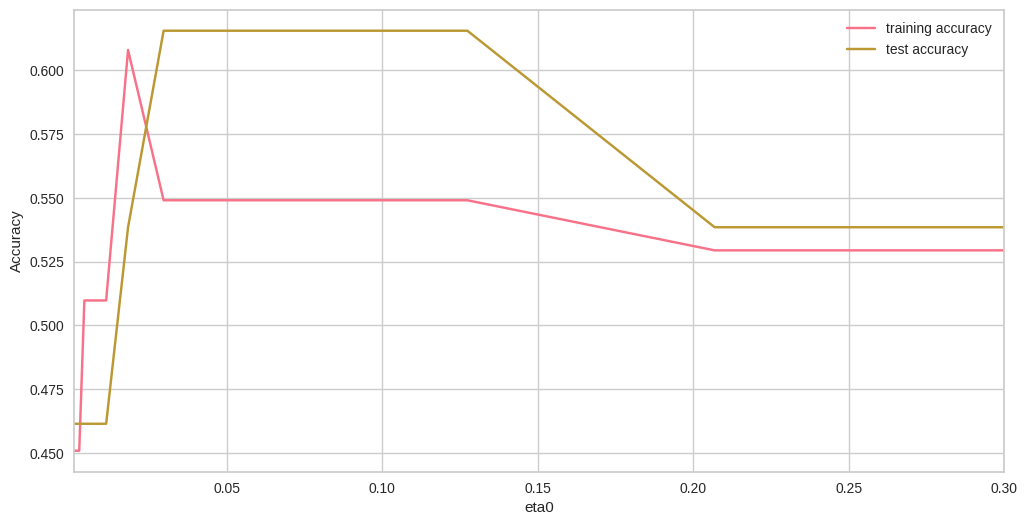

In [ ]:
training_accuracy = []
test_accuracy = []
eta0 = np.logspace(-3,1,20)
for eta in eta0:
    clf = Perceptron(max_iter=100, eta0=eta, random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, Y_test))
fig, axe = plt.subplots(ncols=1,figsize=(12, 6)) 
plt.plot(eta0, training_accuracy, label="training accuracy")
plt.plot(eta0, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("eta0")
plt.xlim(0.001, 0.3)
plt.legend()
plt.show()

###Crear y Entrenar el perceptrón

In [ ]:
clf_per = Perceptron(max_iter=100, eta0=0.10, random_state=42)
clf_per.fit(X_train,Y_train.ravel())

Perceptron(eta0=0.1, max_iter=100, random_state=42)

### Prueba con datos de entrenamiento

Accuracy: 0.5490


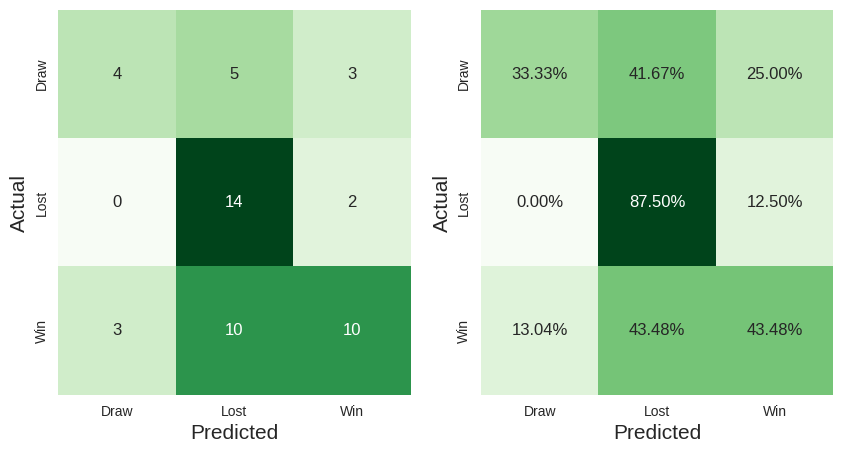

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_per = clf_per.predict(X_train)
print('Accuracy: %.4f' % accuracy_score(Y_train, y_pred_per))
sns.heatmap(confusion_matrix(Y_train, y_pred_per), fmt=".0f",
            annot=True, xticklabels=labels, yticklabels=labels, 
            ax=ax[0], cbar=False, cmap="Greens")
sns.heatmap(confusion_matrix(Y_train, y_pred_per, normalize='true'), fmt=".2%",
            annot=True, xticklabels=labels, yticklabels=labels,
            ax=ax[1], cbar=False, cmap="Greens")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

### Prueba con datos de validación

Accuracy: 0.6154


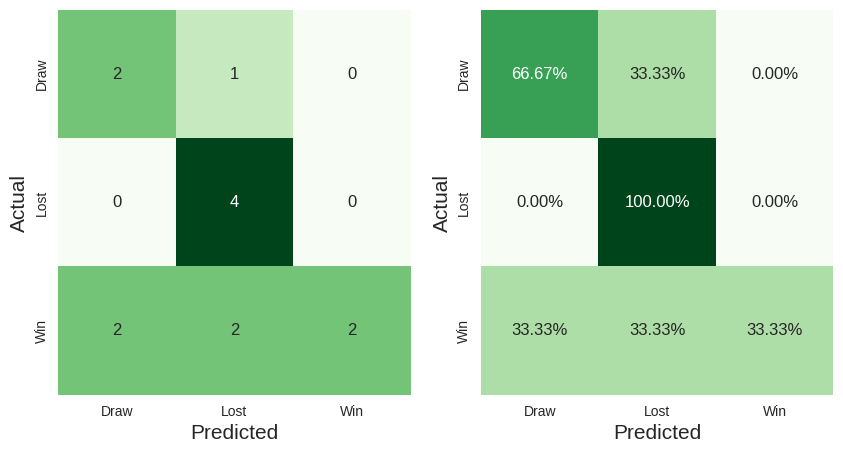

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_per = clf_per.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred_per))
sns.heatmap(confusion_matrix(Y_test, y_pred_per), fmt=".0f",
            xticklabels=labels, yticklabels=labels, annot=True,
            ax=ax[0], cbar=False, cmap="Greens")
sns.heatmap(confusion_matrix(Y_test, y_pred_per, normalize='true'), fmt=".2%",
            annot=True, xticklabels=labels, yticklabels=labels, 
            ax=ax[1], cbar=False, cmap="Greens")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

## Método 2: Arboles de decisión

### Selección de Hiperparámetros

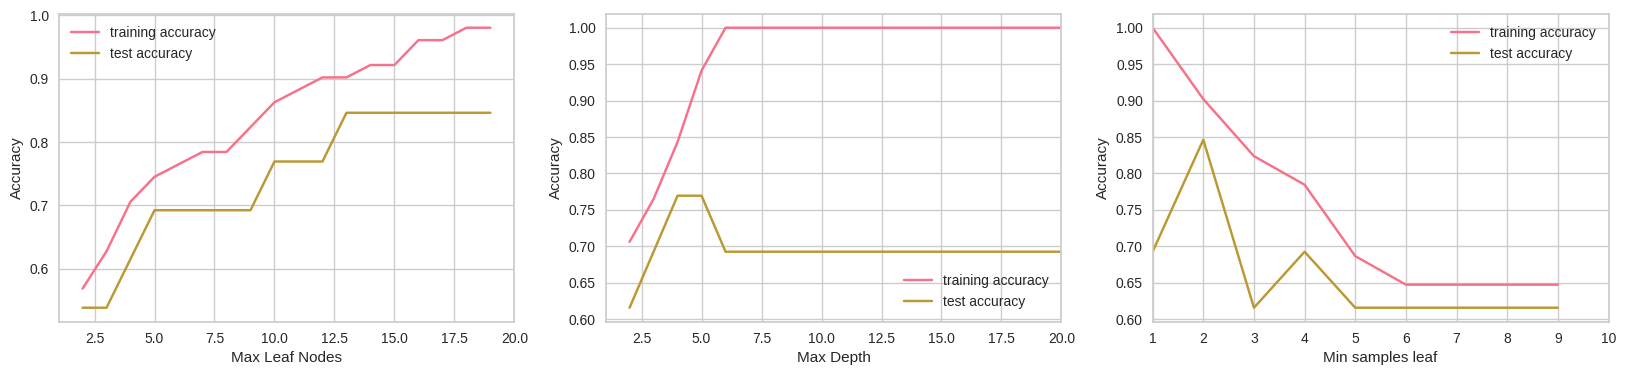

In [ ]:
training_accuracy_l1 = []
test_accuracy_l1 = []
max_leaf_nodes = range(2, 20, 1)
for leaf_nodes in max_leaf_nodes:
    # build the model
    clf = DecisionTreeClassifier(max_leaf_nodes=leaf_nodes, random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l1.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l1.append(clf.score(X_test, Y_test))
training_accuracy_l2 = []
test_accuracy_l2 = []
max_depth = range(2, 31, 1)
for depth in max_depth:
    # build the model
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l2.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l2.append(clf.score(X_test, Y_test))
training_accuracy_l3 = []
test_accuracy_l3 = []
min_samples_leaf = range(1, 10, 1)
for samples_leaf in min_samples_leaf:
    # build the model
    clf = DecisionTreeClassifier(min_samples_leaf=samples_leaf,random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l3.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l3.append(clf.score(X_test, Y_test))    
fig, axe = plt.subplots(ncols=3,figsize=(20, 4))
plt.subplot(1,3,1)
plt.plot(max_leaf_nodes, training_accuracy_l1, label="training accuracy")
plt.plot(max_leaf_nodes, test_accuracy_l1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max Leaf Nodes")
plt.xlim(1, 20)
plt.legend()
plt.subplot(1,3,2)
plt.plot(max_depth, training_accuracy_l2, label="training accuracy")
plt.plot(max_depth, test_accuracy_l2, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.xlim(1, 20)
plt.legend()
plt.subplot(1,3,3)
plt.plot(min_samples_leaf, training_accuracy_l3, label="training accuracy")
plt.plot(min_samples_leaf, test_accuracy_l3, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Min samples leaf")
plt.xlim(1, 10)
plt.legend()
plt.show()

###Crear y Entrenar el Arbol de Decisión

In [ ]:
clf_DT =DecisionTreeClassifier(random_state=42,max_depth = 7)
clf_DT.fit(X_train,Y_train.ravel())

DecisionTreeClassifier(max_depth=7, random_state=42)

###Análisis del arbol de Decisión

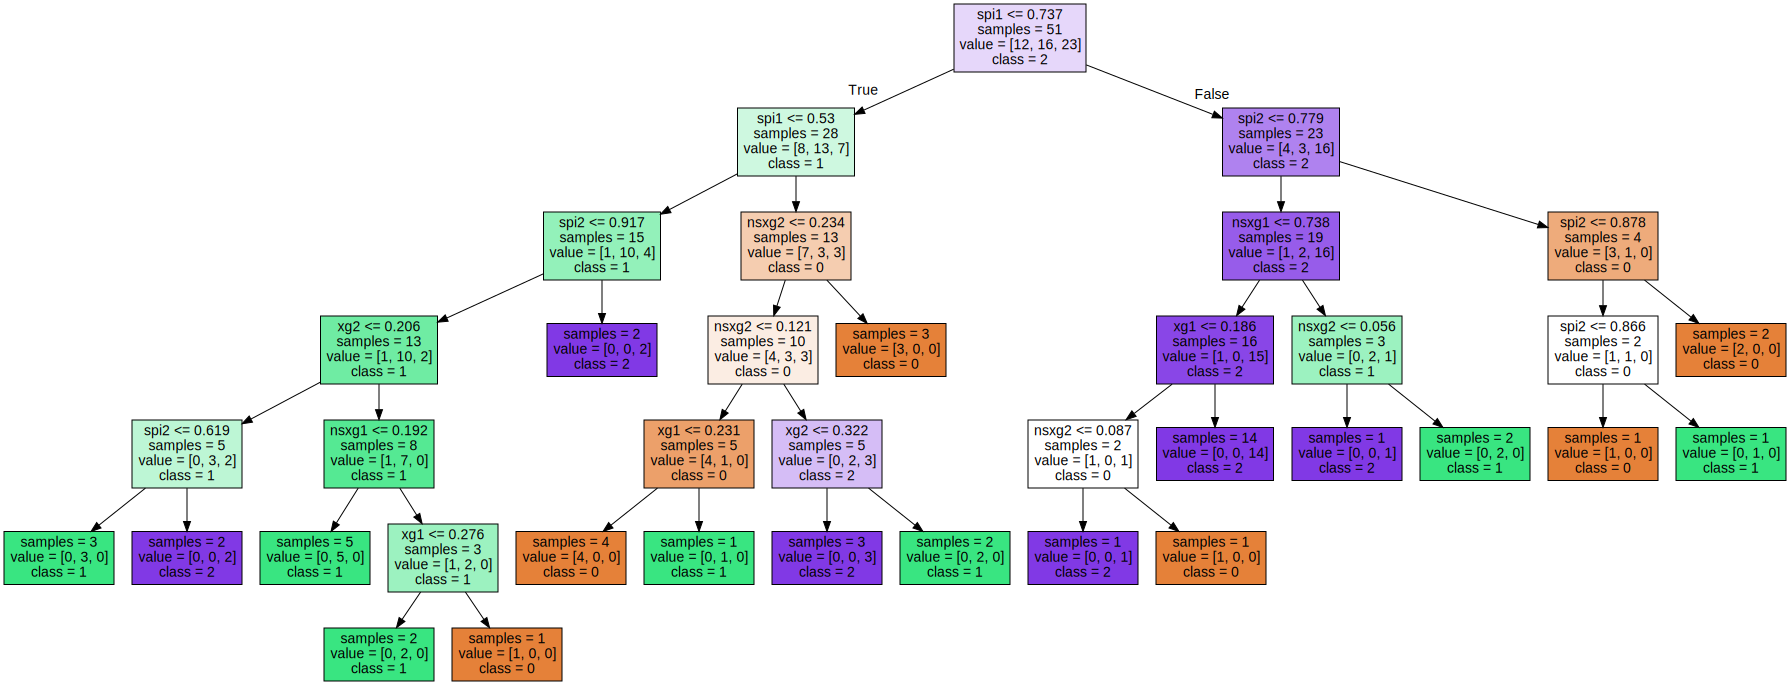

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(clf_DT, out_file = "arbol.dot", class_names=["0","1","2"], 
                feature_names = view, impurity=False, filled=True)
with open("arbol.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

### Feature Importance

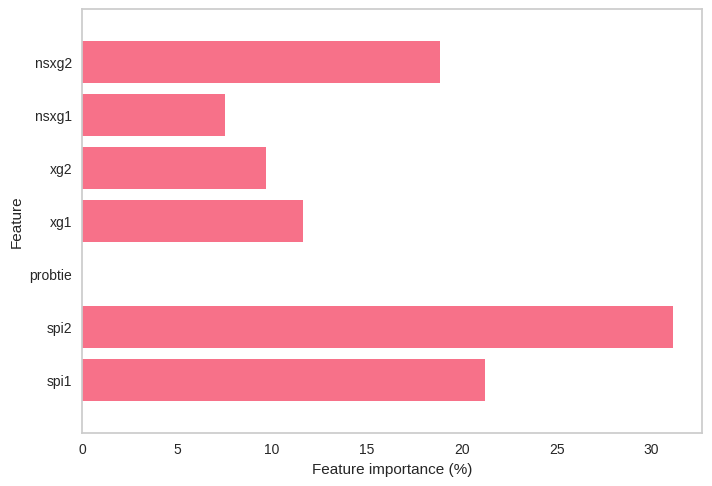

In [ ]:
n_features = view.shape[0]
plt.barh(range(n_features),clf_DT.feature_importances_*100, align='center')
plt.yticks(np.arange(n_features), view)
plt.xlabel("Feature importance (%)")
plt.ylabel("Feature")
plt.grid("")
plt.ylim(-1,n_features)
plt.show()

### Prueba con datos de entrenamiento

Accuracy: 1.00


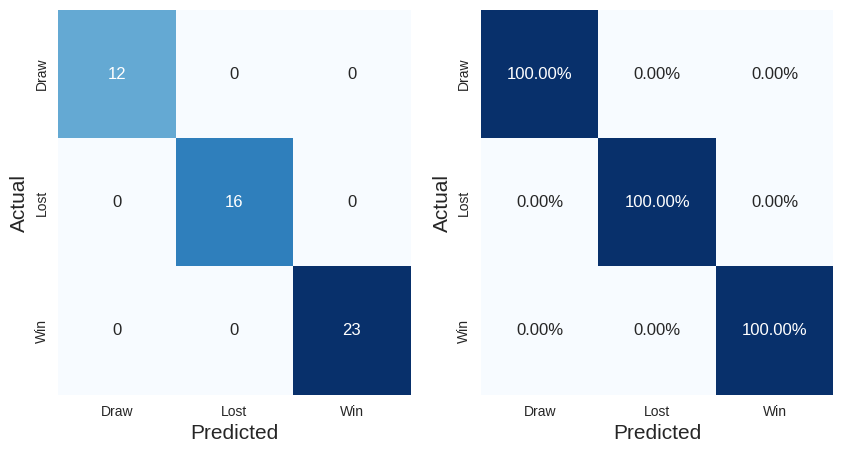

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_DT = clf_DT.predict(X_train)
print('Accuracy: %.2f' % accuracy_score(Y_train, y_pred_DT))
sns.heatmap(confusion_matrix(Y_train, y_pred_DT), fmt=".0f", 
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
sns.heatmap(confusion_matrix(Y_train, y_pred_DT, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

### Prueba con datos de validación

Accuracy: 0.6923


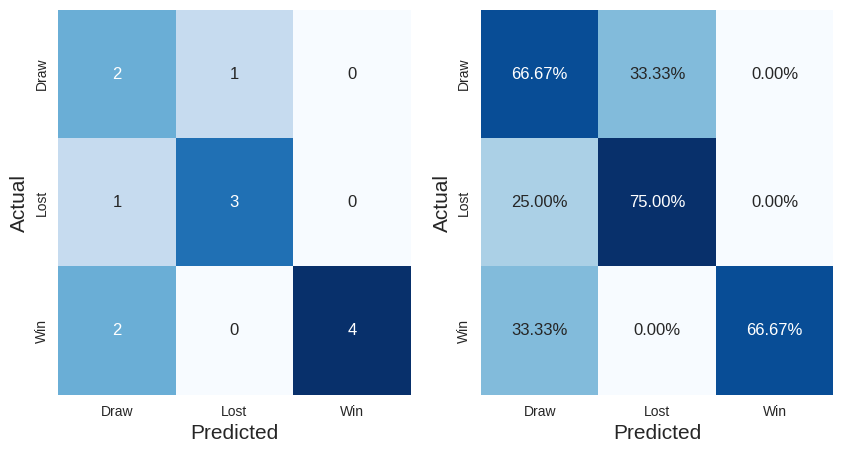

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_DT = clf_DT.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred_DT))
sns.heatmap(confusion_matrix(Y_test, y_pred_DT), fmt=".0f",
            annot=True, ax=ax[0],xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
sns.heatmap(confusion_matrix(Y_test, y_pred_DT, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1],xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

## Método 3: Regresión Logística

### Selección de Hiperparámetros

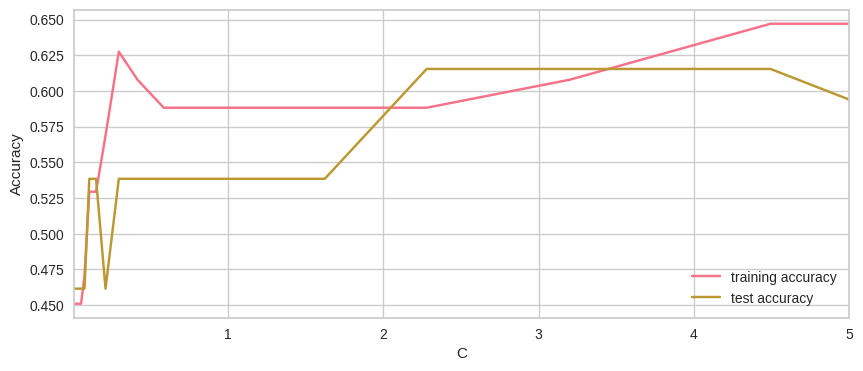

In [ ]:
training_accuracy_l = []
test_accuracy_l = []
C = np.logspace(-2,0.8,20) 
for C_p in C:
    # build the model
    clf = LogisticRegression(C=C_p,random_state=42, solver='newton-cg')
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l.append(clf.score(X_test, Y_test))
fig, axe = plt.subplots(ncols=1,figsize=(10, 4))
plt.plot(C, training_accuracy_l, label="training accuracy")
plt.plot(C, test_accuracy_l, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.xlim(1e-2, 5)
plt.legend()
plt.show()

### Crear y entrenar la regresión logística

In [ ]:
clf_log = LogisticRegression(C=4.5, solver='newton-cg', random_state=42)
clf_log.fit(X_train, Y_train.ravel())

LogisticRegression(C=4.5, random_state=42, solver='newton-cg')

### Prueba con datos de entrenamiento

Accuracy: 0.6471


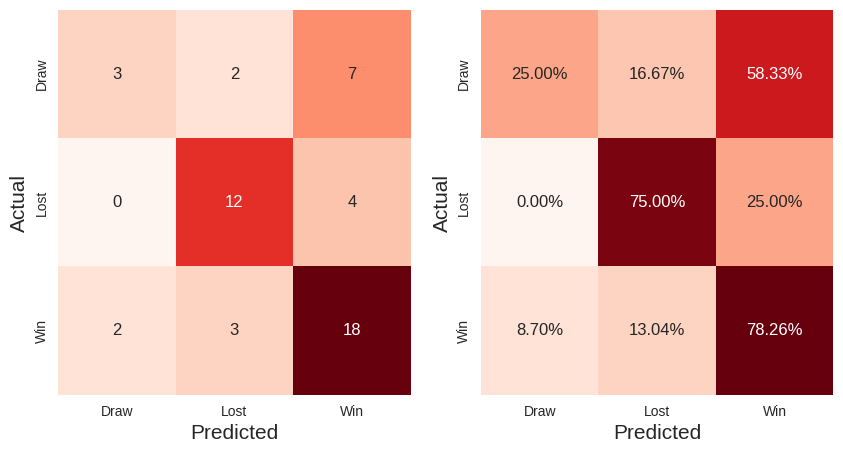

In [ ]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred_log = clf_log.predict(X_train)
print('Accuracy: %.4f' % accuracy_score(Y_train, y_pred_log))
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(Y_train, y_pred_log), fmt=".0f",
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds");
sns.heatmap(confusion_matrix(Y_train, y_pred_log, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds");
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

###Prueba con datos de validación

Accuracy: 0.6154


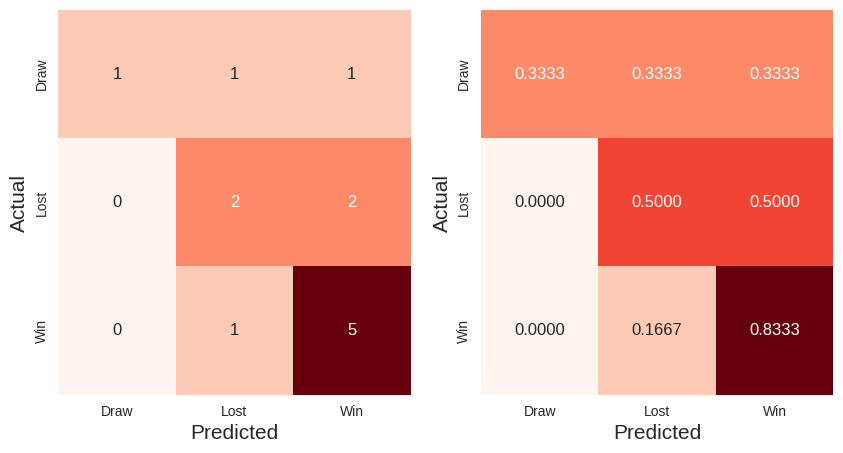

In [ ]:
y_pred_log = clf_log.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred_log))
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(Y_test, y_pred_log), fmt=".0f",
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds")
sns.heatmap(confusion_matrix(Y_test, y_pred_log, normalize='true'), fmt=".4f",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

##Metodo 4: Máquinas de Soporte Vectorial (SVM)


### Selección de Hiperparámetros

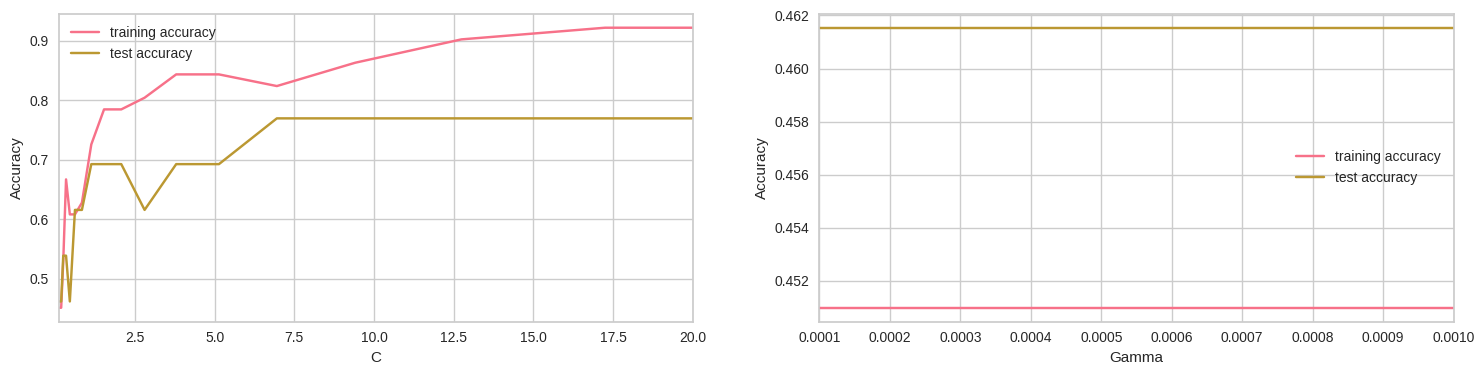

In [ ]:
training_accuracy_l1 = []
test_accuracy_l1 = []
C = np.logspace(-1,1.5,20) 
for C_p in C:
    # build the model
    clf = SVC(C=C_p,random_state=42,kernel='rbf')  #si es necesario cambiar kernel !!!!!
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l1.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l1.append(clf.score(X_test, Y_test))
training_accuracy_l2 = []
test_accuracy_l2 = []
gamma = np.logspace(-4,-3,20) 
for gamma_p in gamma:
    # build the model
    clf = SVC(gamma=gamma_p,random_state=42,kernel='rbf')
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l2.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l2.append(clf.score(X_test, Y_test))
fig, axe = plt.subplots(ncols=2,figsize=(18, 4))
plt.subplot(1,2,1)
plt.plot(C, training_accuracy_l1, label="training accuracy")
plt.plot(C, test_accuracy_l1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.xlim(0.1, 20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(gamma, training_accuracy_l2, label="training accuracy")
plt.plot(gamma, test_accuracy_l2, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Gamma")
plt.xlim(0.0001, 0.001)
plt.legend()
plt.show()


### Creación del SVM

In [ ]:
from sklearn.pipeline import Pipeline
clf_svm = SVC(C=18, random_state=42, kernel='rbf')
clf_svm.fit(X_train, Y_train.ravel())

SVC(C=18, random_state=42)

### Prueba con datos de entrenamiento

Accuracy: 0.9216


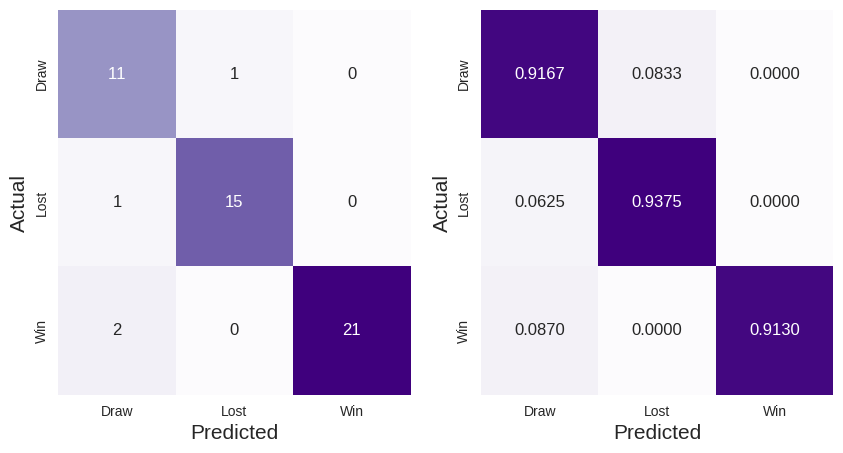

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_svm = clf_svm.predict(X_train)
print('Accuracy: %.4f' % accuracy_score(Y_train, y_pred_svm))
sns.heatmap(confusion_matrix(Y_train, y_pred_svm), fmt=".0f",
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Purples")
sns.heatmap(confusion_matrix(Y_train, y_pred_svm, normalize='true'), fmt=".4f",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Purples")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

###Prueba con datos de validación

Accuracy: 0.7692


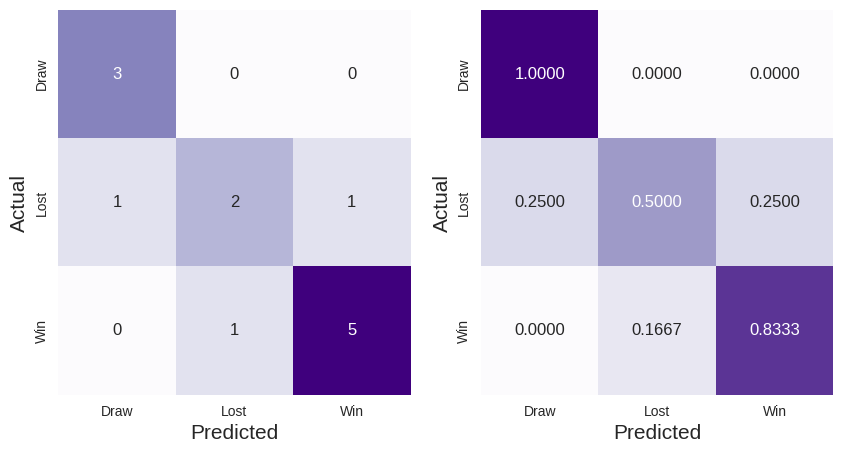

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_svm = clf_svm.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred_svm))
sns.heatmap(confusion_matrix(Y_test, y_pred_svm), fmt=".0f",
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Purples")
sns.heatmap(confusion_matrix(Y_test, y_pred_svm, normalize='true'), fmt=".4f",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Purples")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

# Algunas Visualizaciones de métricas

In [ ]:
# Specify the target classes
classes = list(Clases.index)
# select classifiers 
classifiers=[clf_per, clf_DT, clf_log, clf_svm]

## Classification Report

### Datos de entrenamiento

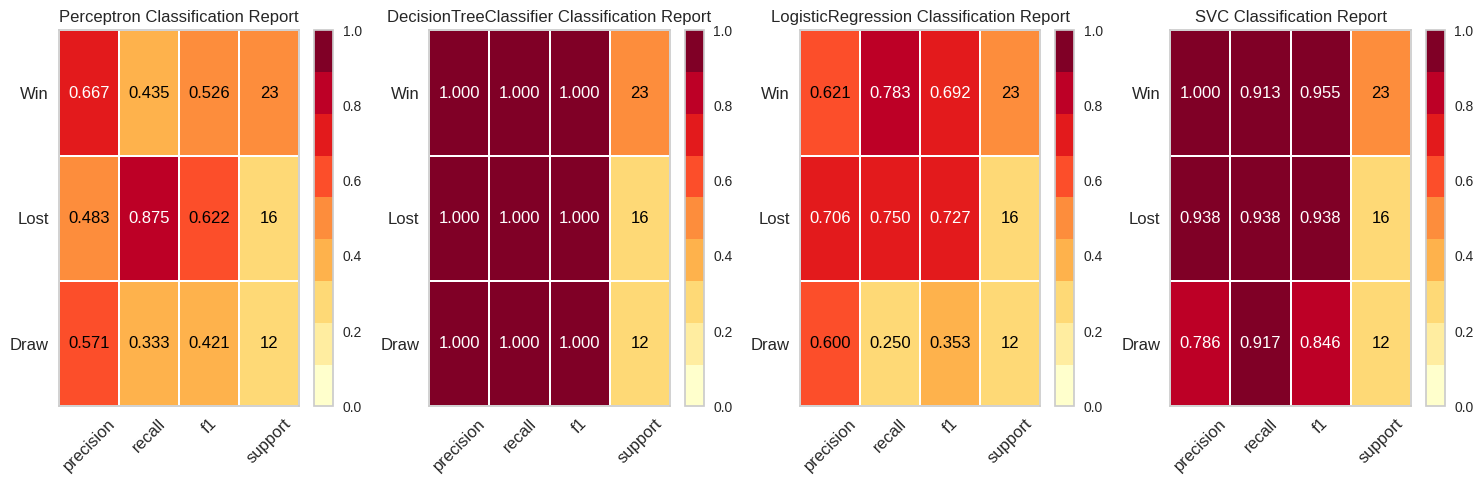

In [ ]:
fig, axe = plt.subplots(ncols=4,nrows=1,figsize=(15, 5)) 
fig.tight_layout(pad=8.0)  
visualgrid = [ClassificationReport(classifiers[0], classes=classes, support=True, force_model=True, ax=axe[0]),
              ClassificationReport(classifiers[1], classes=classes, support=True,ax=axe[1]),
              ClassificationReport(classifiers[2], classes=classes, support=True,ax=axe[2]),
              ClassificationReport(classifiers[3], classes=classes, support=True,ax=axe[3])]
for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_train, Y_train)
  viz.finalize()
fig.show()

### Datos de prueba

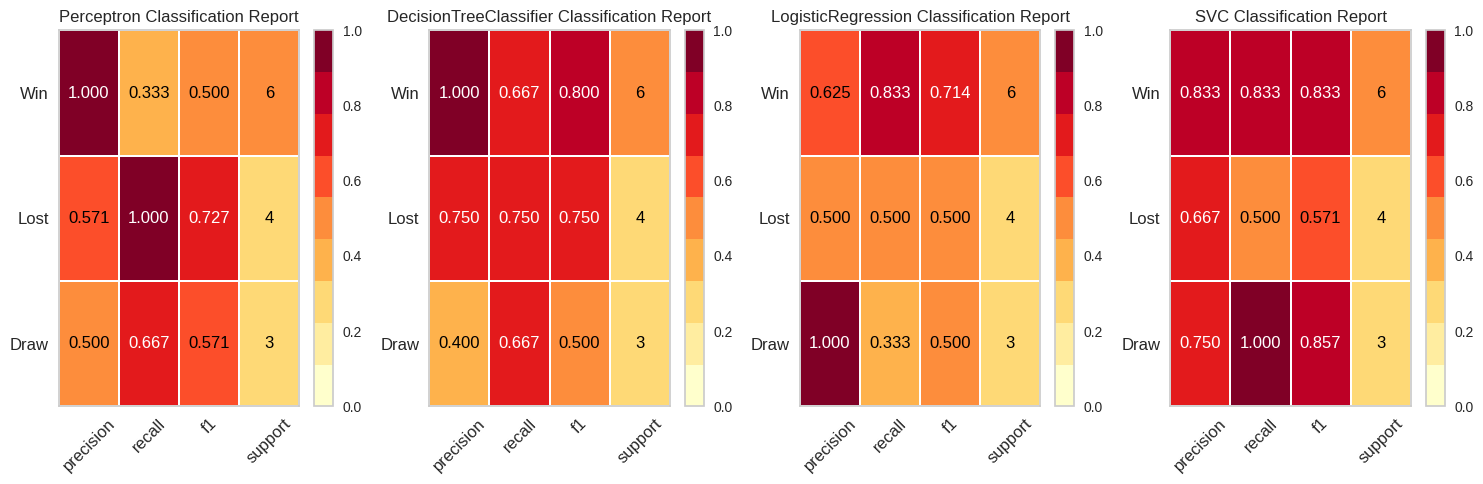

In [ ]:
fig, axe = plt.subplots(ncols=4,nrows=1,figsize=(15, 5)) 
fig.tight_layout(pad=8.0)  
visualgrid = [ClassificationReport(classifiers[0], classes=classes, support=True,ax=axe[0]),
              ClassificationReport(classifiers[1], classes=classes, support=True,ax=axe[1]),
              ClassificationReport(classifiers[2], classes=classes, support=True,ax=axe[2]),
              ClassificationReport(classifiers[3], classes=classes, support=True,ax=axe[3])]
counter1 = 0
for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_test, Y_test)
  viz.finalize()
fig.show()

## Class Prediction Error (CPE)

### Datos de entrenamiento

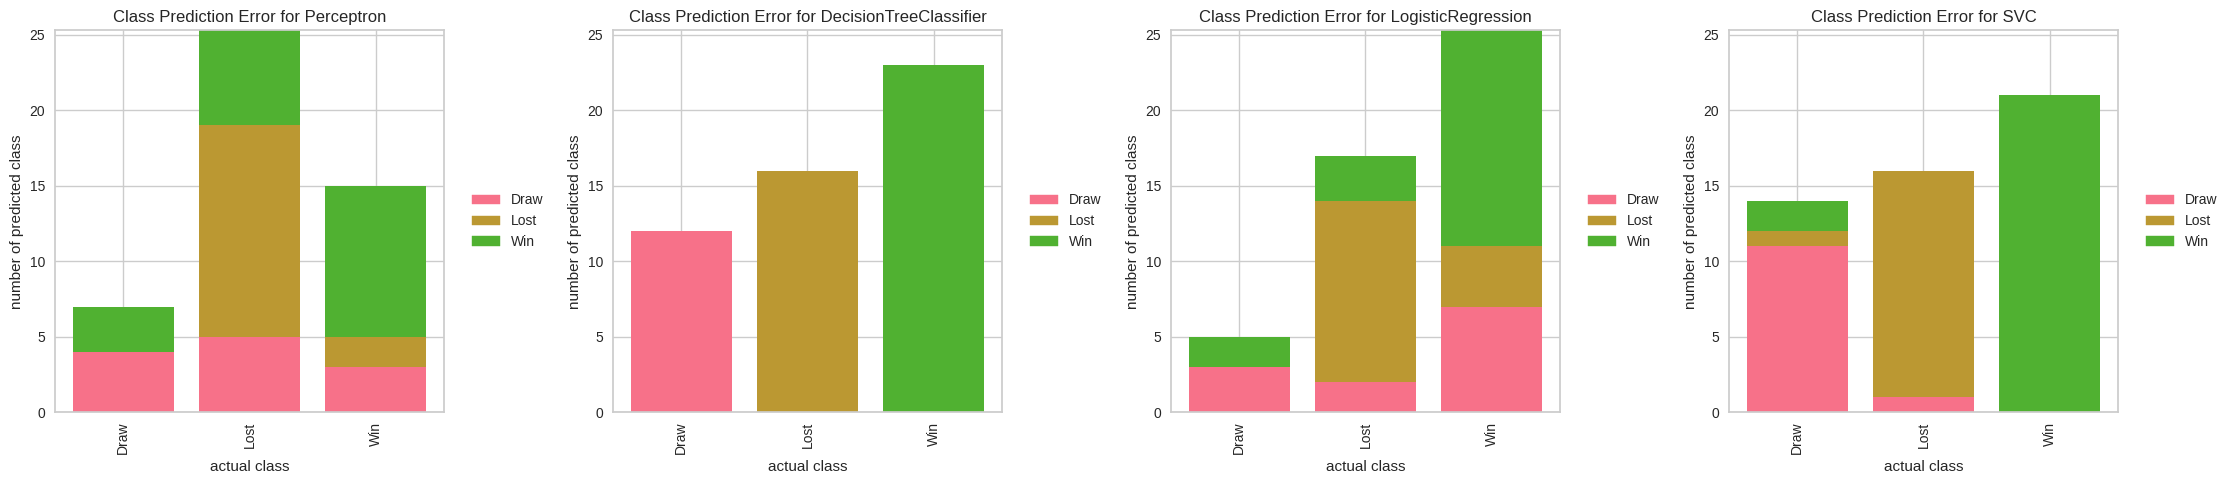

In [ ]:
fig, axe = plt.subplots(ncols=4,figsize=(25, 5)) 
fig.tight_layout(pad=8.0)  
visualgrid = [ClassPredictionError(classifiers[0], classes=classes, ax=axe[0]),
              ClassPredictionError(classifiers[1], classes=classes, ax=axe[1]),
              ClassPredictionError(classifiers[2], classes=classes, ax=axe[2]),
              ClassPredictionError(classifiers[3], classes=classes, ax=axe[3])]

for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_train, Y_train)
  viz.finalize()

plt.show()

### Datos de validación

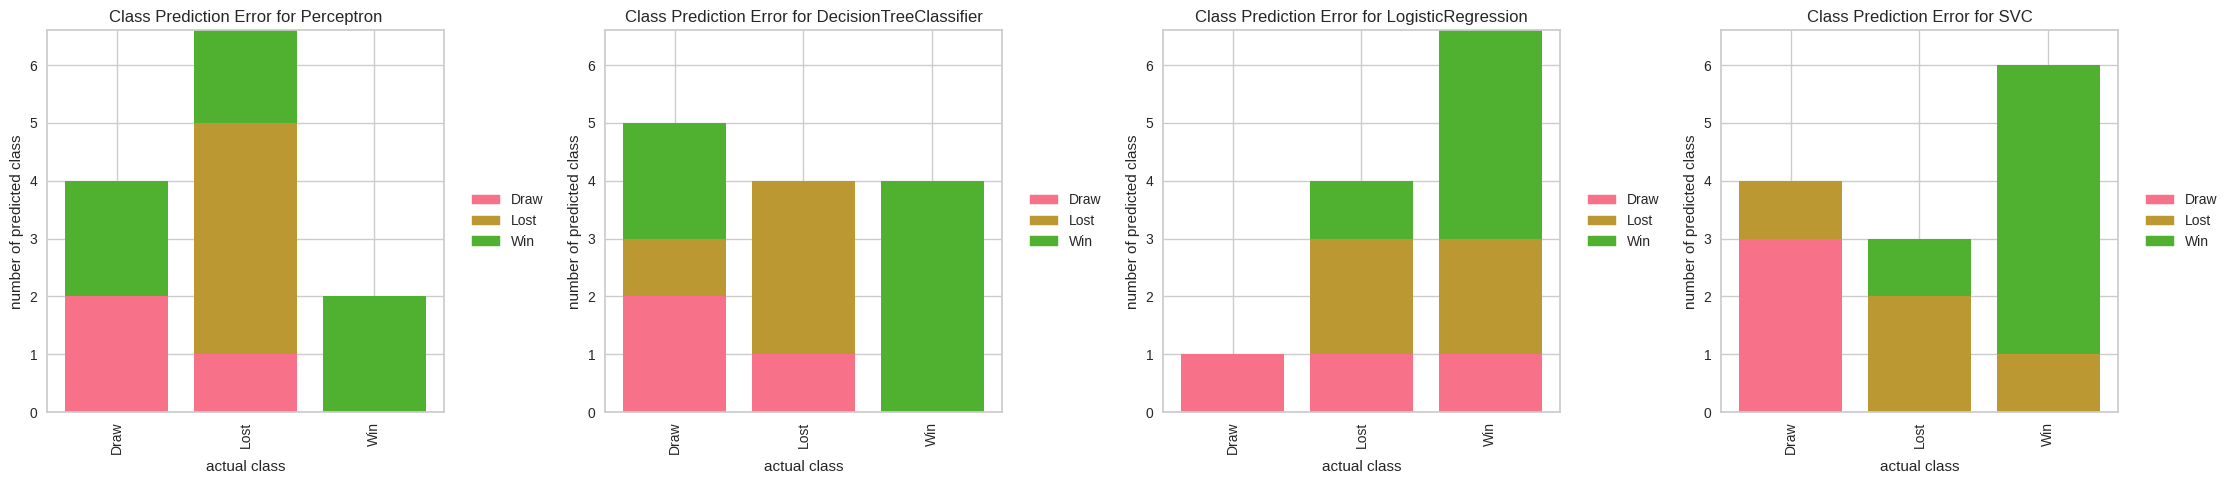

In [ ]:
fig, axe = plt.subplots(ncols=4,figsize=(25, 5)) 
fig.tight_layout(pad=8.0)  
visualgrid = [ClassPredictionError(classifiers[0], classes=classes, ax=axe[0]),
              ClassPredictionError(classifiers[1], classes=classes, ax=axe[1]),
              ClassPredictionError(classifiers[2], classes=classes, ax=axe[2]),
              ClassPredictionError(classifiers[3], classes=classes, ax=axe[3])]

for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_test, Y_test)
  viz.finalize()

plt.show()